# Global Power Plant Database Project

Problem Statement:

Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database

The database includes the following indicators:

   -  country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
   -  country_long (text): longer form of the country designation
   -  name (text): name or title of the power plant, generally in Romanized form
   -  gppd_idnr (text): 10 or 12 character identifier for the power plant
   -  capacity_mw (number): electrical generating capacity in megawatts
   -  latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
   -  longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
   -  primary_fuel (text): energy source used in primary electricity generation or export
   -  other_fuel1 (text): energy source used in electricity generation or export
   -  other_fuel2 (text): energy source used in electricity generation or export
   -  other_fuel3 (text): energy source used in electricity generation or export
   -  commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available
   -  owner (text): majority shareholder of the power plant, generally in Romanized form
   -  source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
   -  url (text): web document corresponding to the source field
   -  geolocation_source (text): attribution for geolocation information
   -  wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
   -  year_of_capacity_data (number): year the capacity information was reported
   -  generation_data_source (text): attribution for the reported generation information
   -  generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013
   -  generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014
   -  generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015
   -  generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016
   -  generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017
   -  generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018
   -  generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019
   -  estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013
   -  estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014
   -  estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015
   -  estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016
   -  estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017
   -  estimated_generation_note_2013 (text): label of the model/method used to estimate generation for the year 2013
   -  estimated_generation_note_2014 (text): label of the model/method used to estimate generation for the year 2014
   -  estimated_generation_note_2015 (text): label of the model/method used to estimate generation for the year 2015
   -  estimated_generation_note_2016 (text): label of the model/method used to estimate generation for the year 2016
   - estimated_generation_note_2017 (text): label of the model/method used to estimate generation for the year 2017
    
Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories.

Prediction:

Make two prediction for labels 1) primary_fuel 2) capacity_mw


Importing all the necessary libraries here.

In [1]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Classification

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# Regression

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

Instead of downloading the entire dataset on my local computer I am simply loading the file directly from the GitHub repository link using the raw option.

In [3]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN




Checking the first 5 and last 5 rows of our entire dataset. We can see that our dataset comprises of total 908 rows and 25 columns.

In our problem statement we have been asked to predict 2 labels primary_fuel and capacity_mw. When we take a look at the values present in the column primary_fuel we see that there are categorical data in that column so when we consider it as our label it will be termed as a Classification problem!

Similarly, if we take a look at the values present in the column capacity_mw we see that there are continous data in that column so when we consider it as our label it will be termed as a Regression problem!

I will choose to perform the analysis on our entire data set first then will process the information accordingly to bifurcate the inputs for a Classification model and a Regression model.


# Exploratory Data Analysis (EDA)

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


Ensuring that in future observations we do not have any truncated information being displayed in our Jupter Notebook.


In [5]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')



Taking a look at all the 25 column names present in our dataset.

In [6]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In the above cell we can see that there are missing values in many columns and few even have all the 908 rows empty that will need to be removed since it provides no insights.

Column names that have more than 50% (more than 454 rows) of missing data and will need to be deleted are:

   -  other_fuel1
   -  other_fuel2
   -  other_fuel3
   -  owner
   -  wepp_id
   -  generation_gwh_2013
   -  generation_gwh_2014
   -  generation_gwh_2015
   -  generation_gwh_2016
   -  generation_gwh_2017
   -  generation_data_source
   -  estimated_generation_gwh

In [7]:
df.drop(["other_fuel1", "other_fuel2", "other_fuel3", "owner", "wepp_id", "generation_gwh_2013",
        "generation_gwh_2014", "generation_gwh_2015", "generation_gwh_2016", "generation_gwh_2017",
        "generation_data_source", "estimated_generation_gwh"], axis=1, inplace=True)



Have dropped all the column that had more than 50% of missing data since it made no sense to treat such a huge chunk of missing value and ultimately make our model biased towards those missing value treated data.


In [8]:
df.shape

(907, 15)



Now our column numbers have been reduced to 13 from the initial value of 25.


In [9]:
df.nunique().to_frame("Unique Values")

,Unique Values
country,1
country_long,1
name,907
gppd_idnr,907
capacity_mw,361
latitude,836
longitude,827
primary_fuel,8
commissioning_year,73
source,191




With the help of nunique method we were able to check the unique data information present in our dataset columns.

Now observing the columns "country" and "country_long" we can see that it only has 1 unique data filled in all 908 rows and does not provide any insight so it can be deleted.

Similarly, the column "year_of_capacity_data" also has 1 single value present in it's rows and has missing data as well so it will not provide any useful information and can be deleted.

Also I see that columns "name" and "gppd_idnr" have all unique data in all the 908 rows of the dataset and being a unique identifier would help building a machine learning model either and can be deleted too.

Finally, I see that there is a column "url" which basically holds web document links and values such as those or descriptions do not really help in machine learning models and we will be deleteing it too.

Jotting down the names of columns that we will need to remove are:

   -  country
   -  country_long
   -  year_of_capacity_data
   -  name
   -  gppd_idnr
   -  url



In [10]:
df.drop(["country", "country_long", "year_of_capacity_data", "name", "gppd_idnr", "url"], axis=1, inplace=True)



We have successfully dropped 6 more columns that were not providing any useful insight for our predition models.


In [11]:
print(df.shape)
df.head()

(907, 9)


,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2018,generation_gwh_2019
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,626.239128,NaN
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,7279.000000,NaN




Now our new dataset has 908 rows and 7 columns after we got rid of all the useless columns post analysis from it's original number of 25.


In [12]:
df.isna().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2018    459
generation_gwh_2019    907
dtype: int64



Okay so we still have missing values present in our dataset columns that will need to be treated now. But before that we will separate our categorical columns and numerical columns so that application of meand and mode will become easier.


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             861 non-null    float64
 2   longitude            861 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   commissioning_year   527 non-null    float64
 5   source               907 non-null    object 
 6   geolocation_source   888 non-null    object 
 7   generation_gwh_2018  448 non-null    float64
 8   generation_gwh_2019  0 non-null      float64
dtypes: float64(6), object(3)
memory usage: 63.9+ KB



Using the info method we can see that out of the 7 columns present in our filtered dataset we have 4 numerical data valued columns and 3 object data valued columns.


In [14]:
# getting list of object data type column names
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        object_datatype.append(x)
print(f"Object Data Type Columns are: ", object_datatype)


# getting the list of float data type column names
float_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64':
        float_datatype.append(x)
print(f"Float Data Type Columns are: ", float_datatype)

Object Data Type Columns are:  ['primary_fuel', 'source', 'geolocation_source']
Float Data Type Columns are:  ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'generation_gwh_2018', 'generation_gwh_2019']




We have successfully bifurcated the object datatype column names and float data type column names. Since we do not have to worry about outliers and skewness in categorical columns we can use this separated column names to pre process only on numerical continous columns.


In [15]:
# filling missing data for continous values with mean
df["latitude"].fillna(df["latitude"].mean(),inplace=True)
df["longitude"].fillna(df["longitude"].mean(),inplace=True)

# filling missing data for categorical values with mode
df["commissioning_year"].fillna(df["commissioning_year"].mode()[0],inplace=True)
df["geolocation_source"].fillna(df["geolocation_source"].mode()[0],inplace=True)



Since we had to take care of the missing data I have chosen to fill the null values in continous data column with it's mean and the null values for categorical data column with it's mode information.


In [16]:
df.isna().sum()

capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
source                   0
geolocation_source       0
generation_gwh_2018    459
generation_gwh_2019    907
dtype: int64



Awesome we have now successfully taken care of all the missing data present in our dataset.


In [17]:
for col in object_datatype:
    print(col)
    print(df[col].value_counts())
    print("="*120)

primary_fuel
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64
source
Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
Maharashtra State Power Generation Co Ltd (MAHAGENCO)            4
Rajasthan Renewable Energy Corporation Limited (RREC)            4
Reliance Power Ltd                                               4
Jk Cement ltd                                                    4
Acc Acc ltd                                                      4
Jaypee Ltd jccl)                                                 3
Shree Sugars ltd                                                 3
Solairedirect          



In the above cell I am taking a look at the object data type columns so as to check how many categories each of them hold and how many values/rows are populated with that data.


# Visualization

In [18]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2018', 'generation_gwh_2019'],
      dtype='object')



Listing down the names of all the columns present in our filtered dataframe. We will analyze each one of them with the help of some visual plots.


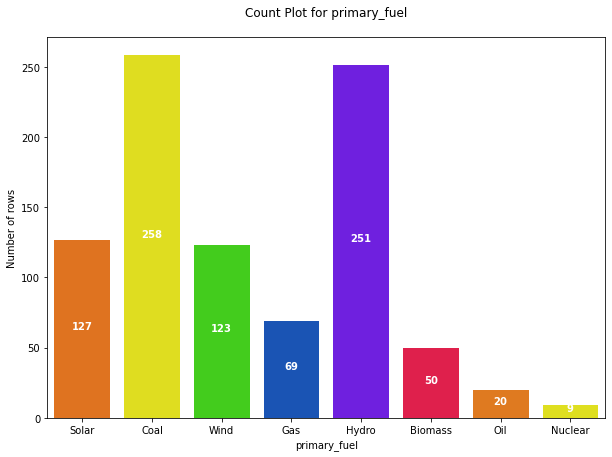

In [19]:
try:
    plt.figure(figsize=(10,7))
    col_name = 'primary_fuel'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    pass



In the above count plot for "primary_fuel" column we can see that the highest number of values have been covered by coal and hydro fuel types then comes solar and wind. Finally we see that gas, biomass, oil and nuclear have very low data counts.

However when we will be considering "primary_fuel" as our target label then this is impose a class imbalance issue while trying to create a classification model and therefore will need to be treated accordingly.


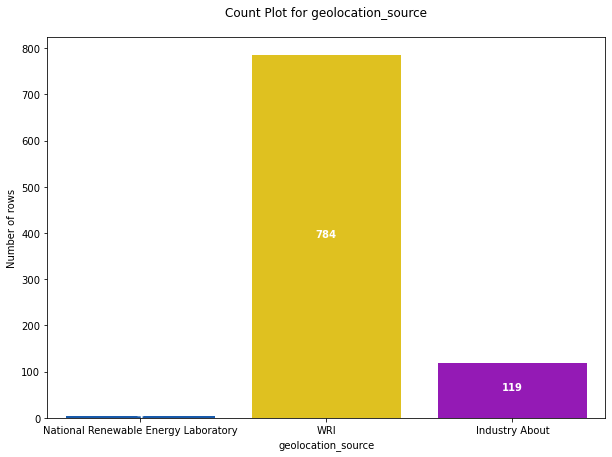

In [20]:
try:
    plt.figure(figsize=(10,7))
    col_name = 'geolocation_source'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    pass



In the above count plot for "geolocation_source" column we see that the highest data value is covered by WRI option and the least value which seems quite negligible has been accumulated by National Renewable Energy Laboratory.

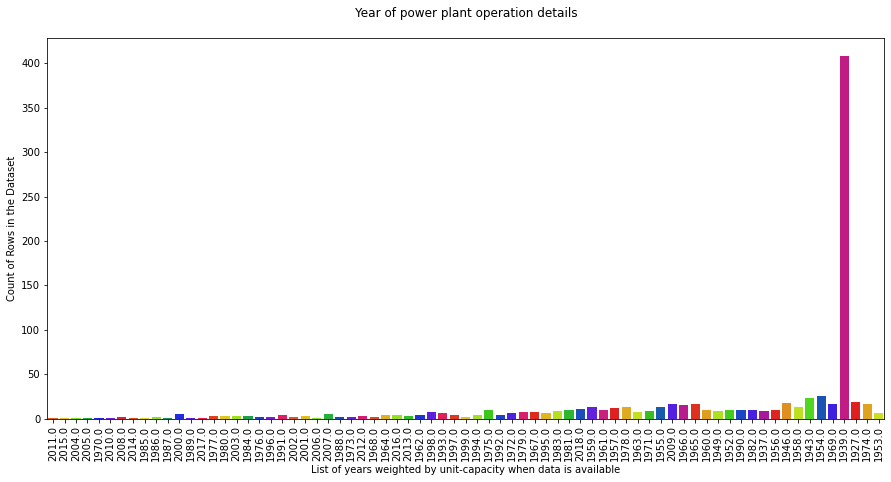

In [21]:
plt.figure(figsize=(15,7))
values = list(df['commissioning_year'].unique())
diag = sns.countplot(df["commissioning_year"], palette="prism")
diag.set_xticklabels(labels=values, rotation=90)
plt.title("Year of power plant operation details\n")
plt.xlabel("List of years weighted by unit-capacity when data is available")
plt.ylabel("Count of Rows in the Dataset")
plt.show()



In the above count plot we can see the list of years as to when the power plant data was made available. Since we had missing values in the "commissioning_year" column we replaced it with the mode wherein the year 1954 covered the most rows in our dataset compared to all the other years.


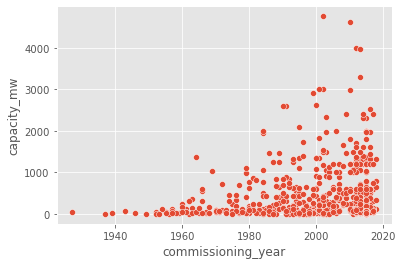

In [22]:
plt.style.use('ggplot')
sns.scatterplot(x = "commissioning_year", y = "capacity_mw", data = df)
plt.show()



In the above scatter plot we can see that the electricity generating capacity measured in mega watts was pretty low in the olden times as compared to recent years due to the invention of efficient fuel types used for power generation.


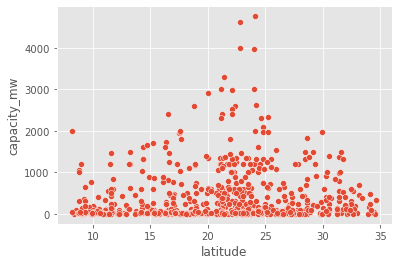

In [23]:
sns.scatterplot(x = "latitude", y = "capacity_mw", data = df)
plt.show()



In the above scatter plot we can see that the latitude geolocation for electricty generation is highest measuring the mega watts between 20 to 25 decimal degrees.


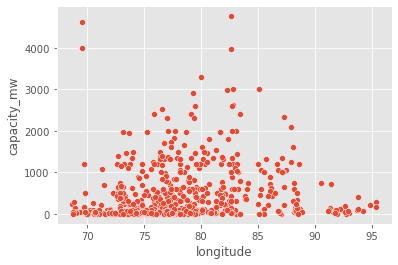

In [24]:
sns.scatterplot(x = "longitude", y = "capacity_mw", data = df)
plt.show()



In the above scatter plot we can see that the longitude geolocation for electricty generation is highest measuring the mega watts around 70 and then again between 80-85 decimal degrees.


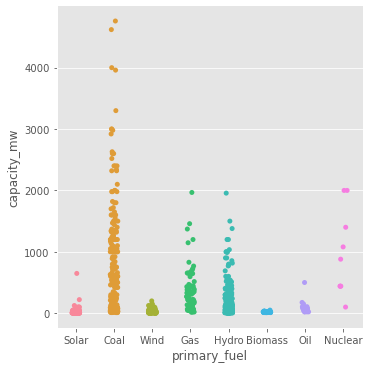

In [25]:
plt.style.use('seaborn-pastel')
sns.catplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.show()



In the above categorical plot we can see that coal is the highest contender when it comes to generating electricity and biomass is used the least.


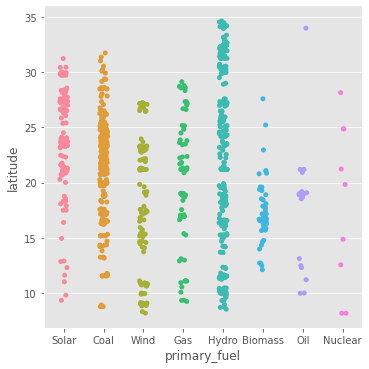

In [26]:
sns.catplot(x = "primary_fuel", y = "latitude", data = df)
plt.show()



In the above categorical plot we can see that hydro fuel type is distributed across all the latitude values considering the water bodies that help in generating electricity at a power plant.


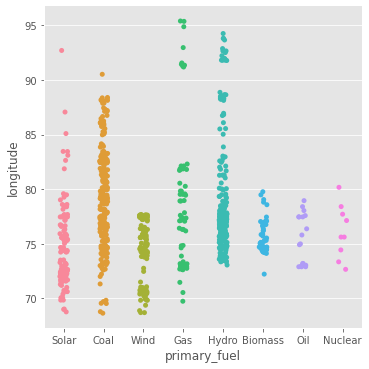

In [27]:
sns.catplot(x = "primary_fuel", y = "longitude", data = df)
plt.show()



In the above categorical plot we can see that longitude wise decimal degress have quite a splitting data between coal and hydro considering the land lock areas rely on coal for electricity generation and costal area rely mostly on the hydro fuel type. Then we have fuel types solar and wind that are quite comprising when targeted across the longitude values.


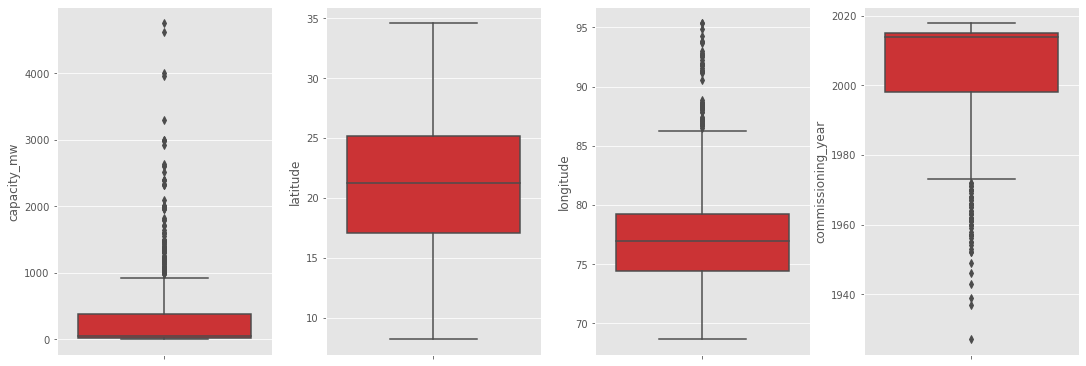

In [28]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df[float_datatype].items():
#     print(col,value)
    if index<4:
        sns.boxplot(y=col, data=df, ax=ax[index], palette="Set1")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()



In the above box plot we can see presence of outliers in our numerical columns that will need to be checked before we start building any machine learning model.


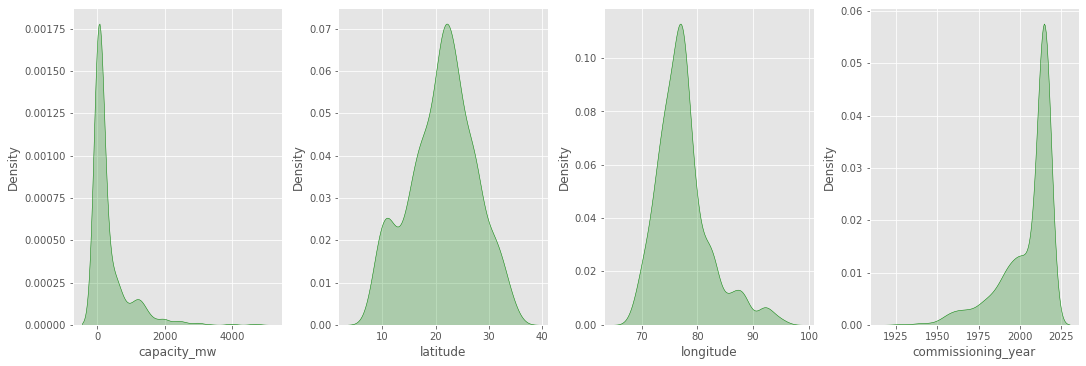

In [29]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df[float_datatype].items():
    if index<4:
        sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()



In the above distribution plot created for our numerical data columns we see skewness and that will need to be treated before we can proceed with our model building process.


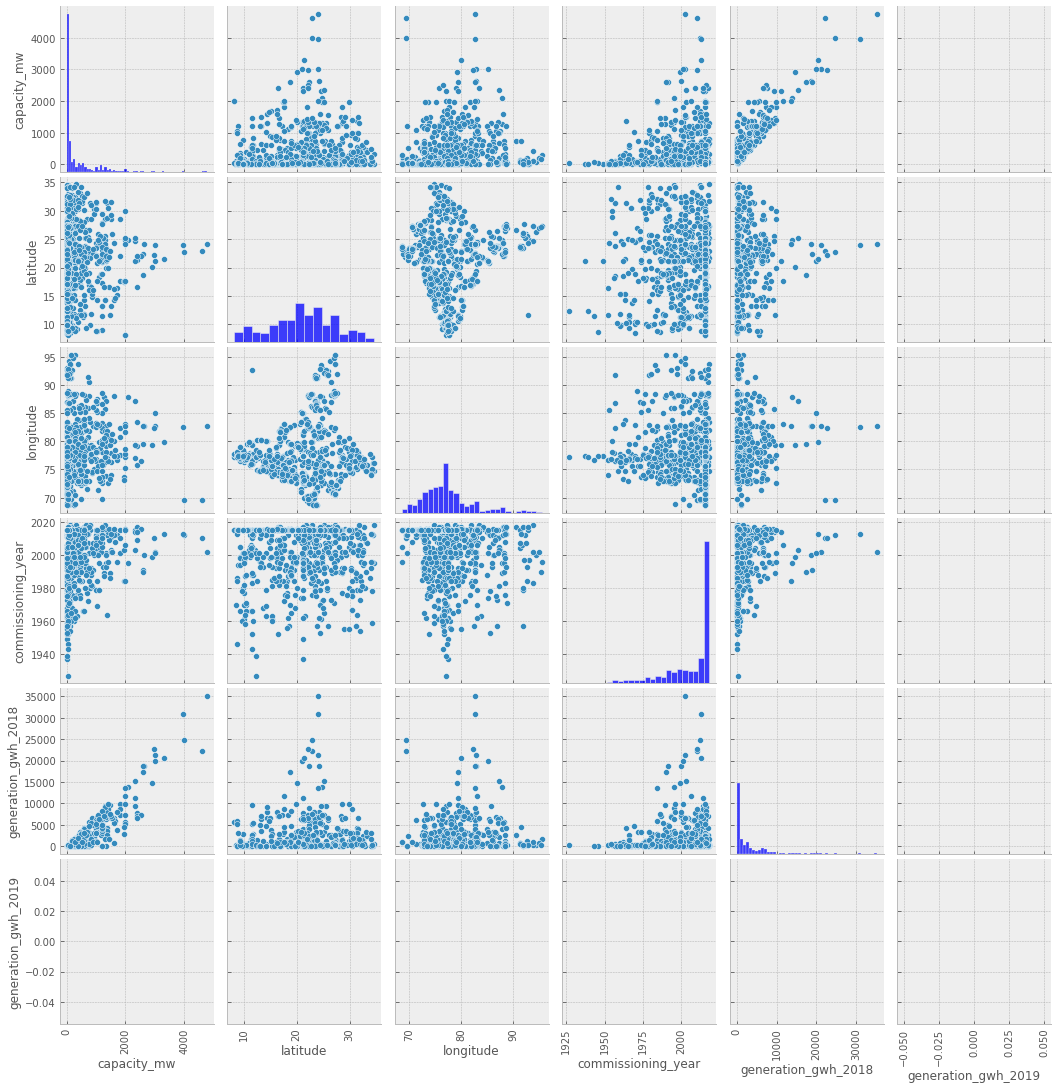

In [30]:
plt.style.use('bmh')
g = sns.pairplot(df)
for ax in g.axes.flat:
    ax.tick_params("x", labelrotation=90)
plt.show()



From the above pair plot we can see the data distribution amongst the numerical data type columns.


# Encoding all the object datatype columns

In [31]:
# Label Encoder

le = LabelEncoder()
df["primary_fuel"] = le.fit_transform(df["primary_fuel"])
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2018,generation_gwh_2019
0,2.5,28.1839,73.2407,6,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN
1,98.0,24.7663,74.6090,1,2015.0,Ultratech Cement ltd,WRI,NaN,NaN
2,39.2,21.9038,69.3732,7,2015.0,CDM,WRI,NaN,NaN
3,135.0,23.8712,91.3602,2,2004.0,Central Electricity Authority,WRI,626.239128,NaN
4,1800.0,21.9603,82.4091,1,2015.0,Central Electricity Authority,WRI,7279.000000,NaN


I am using Label Encoder on our target column "primary_fuel" since we want our labels to be converted from the object datatype to numerical datatype.


In [32]:
# Ordinal Encoder

oe = OrdinalEncoder()
df['geolocation_source'] = oe.fit_transform(df['geolocation_source'].values.reshape(-1,1))
df['source'] = oe.fit_transform(df['source'].values.reshape(-1,1))
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2018,generation_gwh_2019
0,2.5,28.1839,73.2407,6,2011.0,109.0,1.0,NaN,NaN
1,98.0,24.7663,74.6090,1,2015.0,174.0,2.0,NaN,NaN
2,39.2,21.9038,69.3732,7,2015.0,21.0,2.0,NaN,NaN
3,135.0,23.8712,91.3602,2,2004.0,22.0,2.0,626.239128,NaN
4,1800.0,21.9603,82.4091,1,2015.0,22.0,2.0,7279.000000,NaN




I am using the Ordinal Encoder to convert all the categorical feature columns from object datatype to numerical datatype. I could have used one hot encoding but considering that "source" column has lots of unique values the number of columns would have increased a lot so I felt ordinal encoding was a better option here.


# Correlation using a Heatmap

   -  Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.
   -  Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.



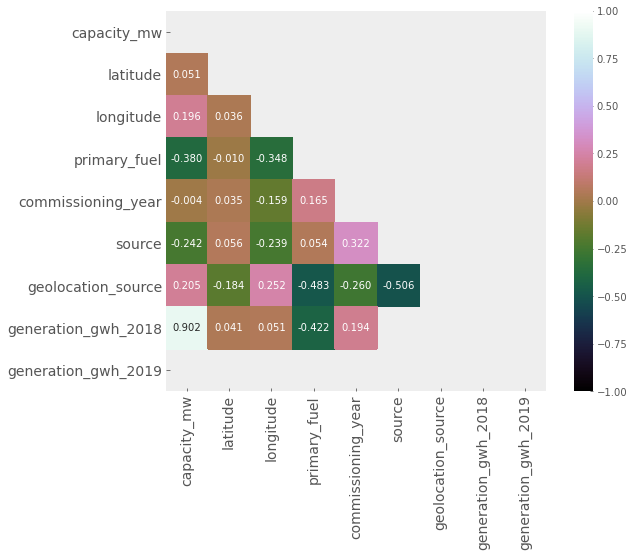

In [33]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cubehelix", mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()



In the above heatmap we can see that our target labels "capacity_mw" and "primary_fuel" has both positive and negative correlations with the remaining feature columns. Also we see very less or negligible amount of multi colinearity so we will not have to worry about it. Since the one's which are reflecting the value are inter dependent on those feature columns and I intend to retain and keep them.


# Correlation Bar Plot comparing features with our labels

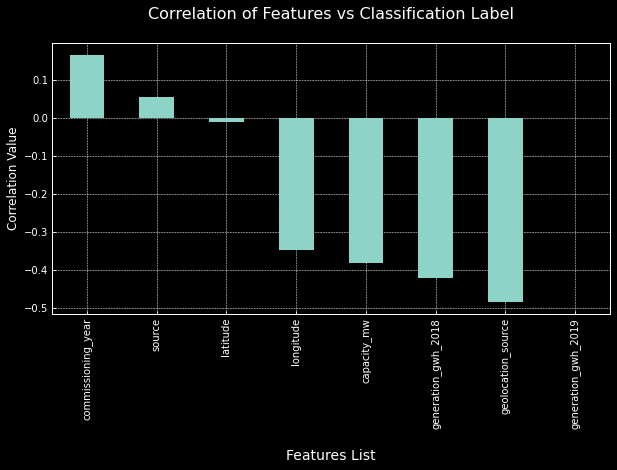

In [34]:
plt.style.use('dark_background')
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['primary_fuel'].sort_values(ascending=False).drop('primary_fuel').plot.bar()
plt.title("Correlation of Features vs Classification Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()



When we consider our classification label "primary_fuel" then we can see the remaining columns that are the features have 2 of them with positive correlation and 4 of them with neagtive correlation.


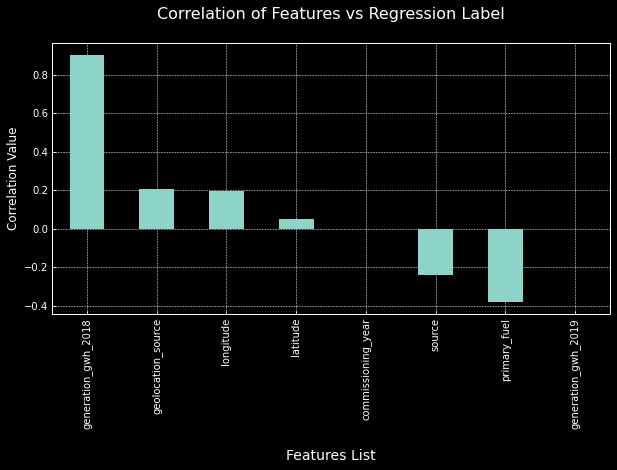

In [35]:
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['capacity_mw'].sort_values(ascending=False).drop('capacity_mw').plot.bar()
plt.title("Correlation of Features vs Regression Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()



When we consider our regression label "capacity_mw" then we can see the remaining columns that are the features have 4 of them with positive correlation and 2 of them with neagtive correlation.


# Using Z Score to remove outliers

In [36]:
# print(df.head())
# z = np.abs(zscore(df))
# print(z)
# threshold = 3
# df1 = df[(z<3).all(axis = 1)]

# print ("Shape of the dataframe before removing outliers: ", df.shape)
# print ("Shape of the dataframe after removing outliers: ", df1.shape)
# print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

# df=df1.copy() # reassigning the changed dataframe name to our original dataframe name



I have used the Z score method to remove the outliers since the IQR method was making me lose way more than 10 percent of data which I could not have afforded to lose.


In [37]:
# df.skew()


The skew method we see that there are columns present in our dataset that are above the acceptable range of +/-0.5 skewness value.


# Using Log Transform to fix skewness

In [38]:
# for col in float_datatype:
#     if df.skew().loc[col]>0.55:
#         df[col]=np.log1p(df[col])


I have applied Log Transformation on our numerical float datatype columns to ensure that we do not have skewness in our dataset.


# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and classification label

In [39]:
# X = df.drop('primary_fuel', axis=1)
X = df.drop('generation_gwh_2019', axis=1)
X = X.dropna()
Y = X['primary_fuel']
X = X.drop('primary_fuel', axis=1)
X.head(100)

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source,generation_gwh_2018
3,135.000,23.871200,91.360200,2004.0,22.0,2.0,626.239128
4,1800.000,21.960300,82.409100,2015.0,22.0,2.0,7279.000000
5,250.000,23.768900,68.644700,2005.0,22.0,2.0,976.655000
6,60.000,10.454700,77.007800,1970.0,22.0,2.0,48.327150
7,192.000,32.225800,77.207000,2010.0,22.0,2.0,579.318850
8,290.000,16.330000,75.886300,2004.0,22.0,2.0,406.377900
9,210.000,23.164200,81.637300,2008.0,22.0,2.0,1487.880000
10,1350.000,21.078200,77.900900,2014.0,22.0,2.0,3717.154000
11,134.000,31.271700,76.493800,1985.0,22.0,2.0,425.641100
12,1200.000,24.200700,82.800000,2011.0,22.0,2.0,7873.973000




I have bifurcated the dataset into features and classification label where X represents all the feature columns and Y represents the classification target label column.


# Resolving the class imbalance issue in our label column

In [40]:
Y.value_counts()

1    188
3    183
2     58
5     11
4      8
Name: primary_fuel, dtype: int64



Listing the values of our classification label column to count the number of rows occupied by each category. This indicates class imbalance that we will need to fix by using the oversampling method.


In [41]:
# adding samples to make all the categorical label values same

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)


SMOTE is the over sampling mechanism that we are using to ensure that all the categories present in our target label have the same value.


In [42]:
Y.value_counts()

1    188
2    188
3    188
4    188
5    188
Name: primary_fuel, dtype: int64



After applying over sampling we are once again listing the values of our label column to cross verify the updated information. Here we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the classification machine learning model does not get biased towards one category.


# Feature Scaling

In [43]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source,generation_gwh_2018
0,-0.638496,0.620765,2.951690,0.513138,0.0,0.0,-0.423692
1,2.144175,0.317194,0.938635,1.332400,0.0,0.0,1.477411
2,-0.446299,0.604514,-2.156905,0.587616,0.0,0.0,-0.323557
3,-0.763841,-1.510620,-0.276088,-2.019126,0.0,0.0,-0.588837
4,-0.543233,1.948002,-0.231289,0.960008,0.0,0.0,-0.437100




I am using the Standard Scaler method to normalize my feature values and ensure that my regression model does not have any kind of biasness towards a particular column value.


# Finding the best random state for building Regression Models

In [44]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best R2 score is", maxAccu,"on Random State", maxRS)

Best R2 score is 0.40992951559003876 on Random State 754



Great so with the help of random state selection process we have found our lucky number to be 135 amongst 1-1000


In [45]:
# Regression Model Function

def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=135)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)


I have built a regression function that splits the training and testing features and labels, then trains the model, predicts the label, calculates the RMSE score, generates the R2 score, calculates the Cross Validation score and finally finds the difference between the R2 score and Cross Validation score.


In [46]:
# Linear Regression Model

model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 1.1851476647852508
R2 Score is: 28.3942417552765
Cross Validation Score: -1734.1369491559963
R2 Score - Cross Validation Score is 1762.5311909112727



Created the Linear Regression model and checked it's evaluation metrics.


In [47]:
# Ridge Regression

model=Ridge(alpha=1e-2, normalize=True)
reg(model, X, Y)

RMSE Score is: 1.1849645969877824
R2 Score is: 28.416361692558823
Cross Validation Score: -1743.6065868842527
R2 Score - Cross Validation Score is 1772.0229485768116



Created the Ridge Regression model and checked it's evaluation metrics.


In [48]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is: 1.5107042693067547
R2 Score is: -16.348805987652
Cross Validation Score: -2586.7951073693253
R2 Score - Cross Validation Score is 2570.446301381673



Created the Decision Tree Regressor model and checked it's evaluation metrics.


In [49]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 0.9927513675982985
R2 Score is: 49.75602328132079
Cross Validation Score: -1768.340434594485
R2 Score - Cross Validation Score is 1818.0964578758058



Created the Random Forest Regressor model and checked it's evaluation metrics.


In [50]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

RMSE Score is: 0.996843303373542
R2 Score is: 49.340977087661045
Cross Validation Score: -1786.0916955744485
R2 Score - Cross Validation Score is 1835.4326726621096



Created the K Neighbors Regressor model and checked it's evaluation metrics.


In [51]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE Score is: 2.452094198322489
R2 Score is: -206.53305762236212
Cross Validation Score: -1106.6435055887825
R2 Score - Cross Validation Score is 900.1104479664205



Created the Gradient Boosting Regressor model and checked it's evaluation metrics.


In [52]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE Score is: 0.869555938199467
R2 Score is: 61.452335703930196
Cross Validation Score: -1188.5550555697644
R2 Score - Cross Validation Score is 1250.0073912736946



Created the Ada Boost Regressor model and checked it's evaluation metrics.


In [53]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE Score is: 0.5089230389503585
R2 Score is: 86.79594753337149
Cross Validation Score: -765.7715717121948
R2 Score - Cross Validation Score is 852.5675192455664



Created the Extra Trees Regressor model and checked it's evaluation metrics.


In [54]:
# XGB Regressor

model=XGBRegressor()
reg(model, X, Y)

RMSE Score is: 0.6345312974560978
R2 Score is: 79.47377365314044
Cross Validation Score: -656.9139870057608
R2 Score - Cross Validation Score is 736.3877606589012



Created the XGB Regressor model and checked it's evaluation metrics.


# Hyper parameter tuning on the best Regression ML Model

In [55]:
# Choosing Extra Trees Regressor

fmod_param = {'criterion' : ['mse', 'mae'],
              'n_estimators' : [100, 200],
              'min_samples_split' : [2, 3],
              'random_state' : [42, 135],
              'n_jobs' : [-1, 1]
             }


After comparing all the regression models I have selected Extra Trees Regressor as my best regression model and have listed down it's parameters above referring the sklearn webpage. I chose Extra Trees Regressor model becuase I feel among all the other regression models it was able to give me a better R2 score and a decent cross validation score for the same.


In [56]:
GSCV = GridSearchCV(ExtraTreesRegressor(), fmod_param, cv=5)


I am using the Grid Search CV method for hyper parameter tuning my best regression model.


In [57]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 200], 'n_jobs': [-1, 1],
                         'random_state': [42, 135]})



I have trained the Grid Search CV with the list of parameters I feel it should check for best possible outcomes.


In [58]:
GSCV.best_params_

{'criterion': 'mse',
 'min_samples_split': 2,
 'n_estimators': 200,
 'n_jobs': -1,
 'random_state': 42}



Here the Grid Search CV has provided me with the best parameters list out of all the combinations it used to train the model.


In [59]:


Final_Model = ExtraTreesRegressor(criterion='mse', min_samples_split=3, n_estimators=100, n_jobs=-1, random_state=42)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)



R2 score for the Best Model is: 81.38878245977378



I have successfully incorporated the Hyper Parameter Tuning on my Final Regression Model and received the R2 score for it.


# Saving the best Regression ML model

In [60]:
filename = "FinalModel_Regression_06"
joblib.dump(Final_Model, filename)

['FinalModel_Regression_06']



Finally, I am saving my best regression model using the joblib library.
